In [1]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn import linear_model
import datetime
import pandas as pd
import pickle        
import numpy as np
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("equipment_training_set.csv")
    

In [3]:
np.random.seed(42)

In [4]:
X = data["String"]
y = data["Matching"]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [7]:
cv = CountVectorizer()
x_train = cv.fit_transform(X_train)


In [8]:
tuned_parameters = {'kernel' : ['linear','rbf'],'gamma':[1e-3,1e-4],
                       'C' : [1,10,100,1000]}

In [9]:
#model2 with gridsearch
clf = GridSearchCV(svm.SVC(),tuned_parameters)

In [10]:
clf.fit(x_train,y_train)

/Users/dhananjayneelakantan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [11]:
print("Accuracy for test set is:", clf.score(x_train,y_train))

Accuracy for test set is: 0.9979550102249489


In [12]:
print(clf.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(clf, x_train, y_train, cv=5)
cross_val_score(clf,x_train,y_train, cv=5, scoring="accuracy")

/Users/dhananjayneelakantan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/dhananjayneelakantan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/dhananjayneelakantan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/dhananjayneelakantan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in 

array([0.92857143, 0.93877551, 0.89795918, 0.91836735, 0.91752577])

In [14]:
from sklearn.metrics import confusion_matrix


In [15]:
confusion_matrix(y_train, y_train_predict)

array([[288,  11],
       [ 28, 162]])

In [16]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_predict)
#Claims that the string is an equipment name 93% of the time. Accuracy of the positive predictions

0.9364161849710982

In [17]:
recall_score(y_train, y_train_predict)
#detects equipment addresses 85% of the time. Ratio of positive instances correctly detected by the classifier

0.8526315789473684

In [18]:
#F1 score - harmonic mean of precision and recall
from sklearn.metrics import f1_score
f1_score(y_train_predict, y_train)


0.8925619834710743

In [19]:
y_scores = cross_val_predict(clf, x_train, y_train, cv=5, method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

/Users/dhananjayneelakantan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/dhananjayneelakantan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/dhananjayneelakantan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/dhananjayneelakantan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in 

In [20]:
#ROC curve
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [21]:
def plot_roc_curve(fpr,tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

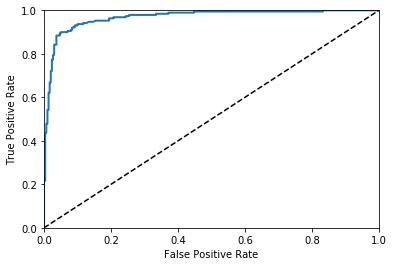

In [22]:
plot_roc_curve(fpr, tpr)
plt.show()

In [23]:
#Compute ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.9684386551663439

In [24]:
x_test = cv.transform(X_test)

In [25]:
#Sample prediction
sample_text = ["32 HANWHA Q "]
vect = cv.transform(sample_text).toarray()
if clf.predict(vect)==0:
        print("Not equipment")
else:
        print("This is classified as an equipment")

Not equipment


In [26]:
print("Accuracy final : ", clf.score(x_test, y_test))

Accuracy final :  0.950207468879668


In [142]:
                                        # #Adding ",1" label to the end of each line
# with open('Equip_Original_Data.csv', 'r') as istr:
#     with open('Labeled_equip_original.csv', 'w') as ostr:
#         for i, line in enumerate(istr):
#             # Get rid of the trailing newline (if any).
#             line = line.rstrip('\n')
#             line += ',1'
#             print(line, file=ostr)

In [27]:
data = pd.read_csv("Equip_Original_Data.csv")
data.head()

,Enphase Energy Inc.,IQ7-60-x-US (240V)
0,Enphase Energy Inc.,IQ7PLUS-72-x-ACM-US (240V)
1,Enphase Energy Inc.,IQ7-60-x-US (240V)
2,TESLA,ACPOWERWALL2.0
3,SolarEdge Technologies Ltd.,SE11400H-US [240V]
4,Enphase Energy Inc.,IQ7-60-x-US (240V)


In [29]:
data.columns = ['Manufacturer', 'Equipment']
data.head()

,Manufacturer,Equipment
0,Enphase Energy Inc.,IQ7PLUS-72-x-ACM-US (240V)
1,Enphase Energy Inc.,IQ7-60-x-US (240V)
2,TESLA,ACPOWERWALL2.0
3,SolarEdge Technologies Ltd.,SE11400H-US [240V]
4,Enphase Energy Inc.,IQ7-60-x-US (240V)


In [30]:
data["Concatenate"] = data["Manufacturer"].map(str) + data["Equipment"]
#data["value"]=data["1"]
data.head()

,Manufacturer,Equipment,Concatenate
0,Enphase Energy Inc.,IQ7PLUS-72-x-ACM-US (240V),Enphase Energy Inc.IQ7PLUS-72-x-ACM-US (240V)
1,Enphase Energy Inc.,IQ7-60-x-US (240V),Enphase Energy Inc.IQ7-60-x-US (240V)
2,TESLA,ACPOWERWALL2.0,TESLAACPOWERWALL2.0
3,SolarEdge Technologies Ltd.,SE11400H-US [240V],SolarEdge Technologies Ltd.SE11400H-US [240V]
4,Enphase Energy Inc.,IQ7-60-x-US (240V),Enphase Energy Inc.IQ7-60-x-US (240V)


In [31]:
#To find null values if any
data.isnull().values.any()

True

In [32]:
df=data.dropna()
#df.drop(df.columns[[0,1]], axis=1, inplace=True)
df.head()
#Xfinalval = df["address"]
#yfinalval = df["value"]

,Manufacturer,Equipment,Concatenate
0,Enphase Energy Inc.,IQ7PLUS-72-x-ACM-US (240V),Enphase Energy Inc.IQ7PLUS-72-x-ACM-US (240V)
1,Enphase Energy Inc.,IQ7-60-x-US (240V),Enphase Energy Inc.IQ7-60-x-US (240V)
2,TESLA,ACPOWERWALL2.0,TESLAACPOWERWALL2.0
3,SolarEdge Technologies Ltd.,SE11400H-US [240V],SolarEdge Technologies Ltd.SE11400H-US [240V]
4,Enphase Energy Inc.,IQ7-60-x-US (240V),Enphase Energy Inc.IQ7-60-x-US (240V)


In [33]:
df.isnull().values.any()

False

In [34]:
df.to_csv('Cleaned_equip_original.csv')

In [150]:
#print("Accuracy final validation: ", clf.score(xfinalval1, yfinalval1))

In [35]:
#print(any(df['Concatenate'].duplicated()))                     # <--- Prints True
#hello = df.sort_values(by='address').drop_duplicates('address')  # <--- Sort and drop
hello = df.drop_duplicates('Concatenate') #just drop
#print(any(hello['address'].duplicated())) 

In [36]:
hello.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 2714
Data columns (total 3 columns):
Manufacturer    216 non-null object
Equipment       216 non-null object
Concatenate     216 non-null object
dtypes: object(3)
memory usage: 6.8+ KB


In [37]:
hello.to_csv('Duplicate_checker.csv')

In [38]:
#hello.drop(hello.columns['Unnamed: 0'], axis=1, inplace=True)
hello.head()

,Manufacturer,Equipment,Concatenate
0,Enphase Energy Inc.,IQ7PLUS-72-x-ACM-US (240V),Enphase Energy Inc.IQ7PLUS-72-x-ACM-US (240V)
1,Enphase Energy Inc.,IQ7-60-x-US (240V),Enphase Energy Inc.IQ7-60-x-US (240V)
2,TESLA,ACPOWERWALL2.0,TESLAACPOWERWALL2.0
3,SolarEdge Technologies Ltd.,SE11400H-US [240V],SolarEdge Technologies Ltd.SE11400H-US [240V]
5,Fronius USA,Fronius Symo 10.0-3 480 [480V],Fronius USAFronius Symo 10.0-3 480 [480V]


In [39]:
hello.info()
#length = len(hello)
#print (length)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 2714
Data columns (total 3 columns):
Manufacturer    216 non-null object
Equipment       216 non-null object
Concatenate     216 non-null object
dtypes: object(3)
memory usage: 6.8+ KB


In [51]:
from fuzzywuzzy import fuzz
Otext = hello.Concatenate
Ftext = ["A5 Inverter : Enphase IQ7 - 60 - 2 - US(240v)()"]
#print (Otext[1])
print (Ftext[0])

A5 Inverter : Enphase IQ7 - 60 - 2 - US(240v)()


In [53]:
#Similarity matching code using fuzzy
mx =0
count =0 
for i in Otext:
    count = count + 1
    x=fuzz.token_set_ratio(Ftext[0], i)
    if mx<x:
        mx=x
        thread = i
    else:
        mx = mx
if mx<70: #------------>THRESHOLD SET
    print ("Insufficient match according to threshold :",mx,". I still can predict if you lower the threshold!")
else:
    #print ("Similarity matching percentage-->",mx,"percentage")
    print("--EXTRACTION--")
    #print ("The classifier input  is ------->", Ftext[0])
    #print ("The fuzzy pipeline output is --->", thread)
    for row in Otext.index:
        if hello.Concatenate[row]==thread:
            rowfinal = row
            break
    print("The Manufacturer name is ------->" , hello.Manufacturer[rowfinal] )  
    print("The Equipment Model number is -->" , hello.Equipment[rowfinal] )  
    y=fuzz.token_set_ratio(Ftext[0],hello.Equipment[rowfinal])
    if y==100: #model threshold
        print("\n--MODEL VALIDATION--")
        print("MODEL MATCH :",y,"----> The equipment is validated :",hello.Equipment[rowfinal])
    else:
        print("\n")
        print("--MODEL VALIDATION!--")
        print("NOT VALIDATED : MATCH :",y)
    z=fuzz.token_set_ratio(Ftext[0], hello.Manufacturer[rowfinal])
    #print("\nManufacturer name match :",z)

--EXTRACTION--
The Manufacturer name is -------> Enphase Energy Inc.
The Equipment Model number is --> IQ7-60-x-US (240V)


--MODEL VALIDATION!--
NOT VALIDATED : MATCH : 93


In [48]:
# nput="32 HANWHA Q . PEAK DUO BLK - G5 315 315W MODULES PAIRED"
# output="Hanwha Q CELLS,Q.PEAK DUO BLK-G5 315"
# a=fuzz.ratio(nput, output)
# b=fuzz.partial_ratio(nput, output)
# c=fuzz.token_sort_ratio(nput, output)
# d=fuzz.token_set_ratio(nput, output)
# print(a,b,c,d)

